<a href="https://www.kaggle.com/code/ayeshashaikh232/google-play-store?scriptVersionId=127446339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import All Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objs as go # data visualization
import plotly.express as px # data visualization

In [2]:
df=pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Popular App Categories

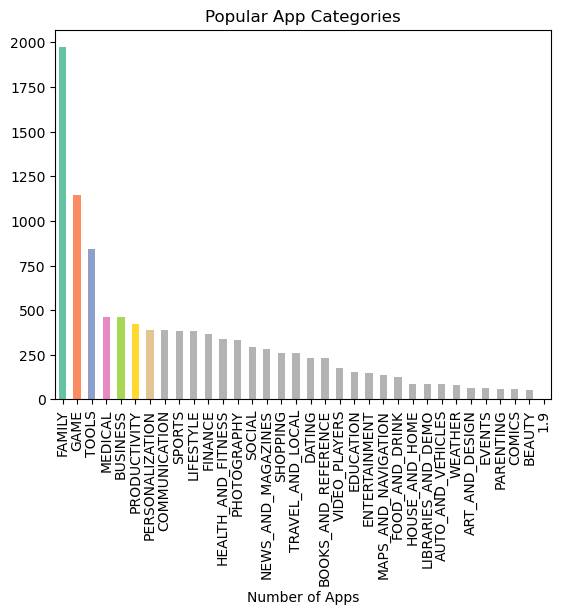

In [4]:
# Group the data by category and count the number of apps in each category
app_count = df.groupby('Category')['App'].count().sort_values(ascending=False)

# Create a horizontal bar plot of the popular app categories
fig, ax = plt.subplots()
colors = plt.cm.Set2(range(len(app_count)))
app_count.plot(kind='bar', ax=ax, color=colors,)
ax.set_xlabel('Number of Apps')
ax.set_title('Popular App Categories')
plt.show()

The number of apps in each category can be analyzed to identify the most popular app categories among users.

# App Ratings

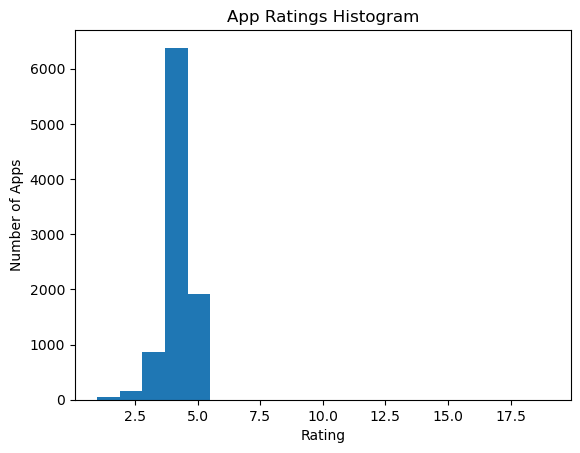

In [5]:
fig, ax = plt.subplots()
ax.hist(df['Rating'], bins=20)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Apps')
ax.set_title('App Ratings Histogram')
plt.show()

# App Reviews

In [6]:
type_count = list(df['Type'].value_counts())
colors = ['14213D','FCA311']
type_ls = list(df['Type'].value_counts().index)
fig = px.pie(values=type_count,names=type_ls)
fig.update_layout(title_text='Free vs Paid Apps in terms %', title_x=0.5,height = 600)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value',marker=dict(colors=colors))

# What are the Top-10 Geners in Play Store?

Text(0.5, 1.0, 'Top 10 Genres in Play Store')

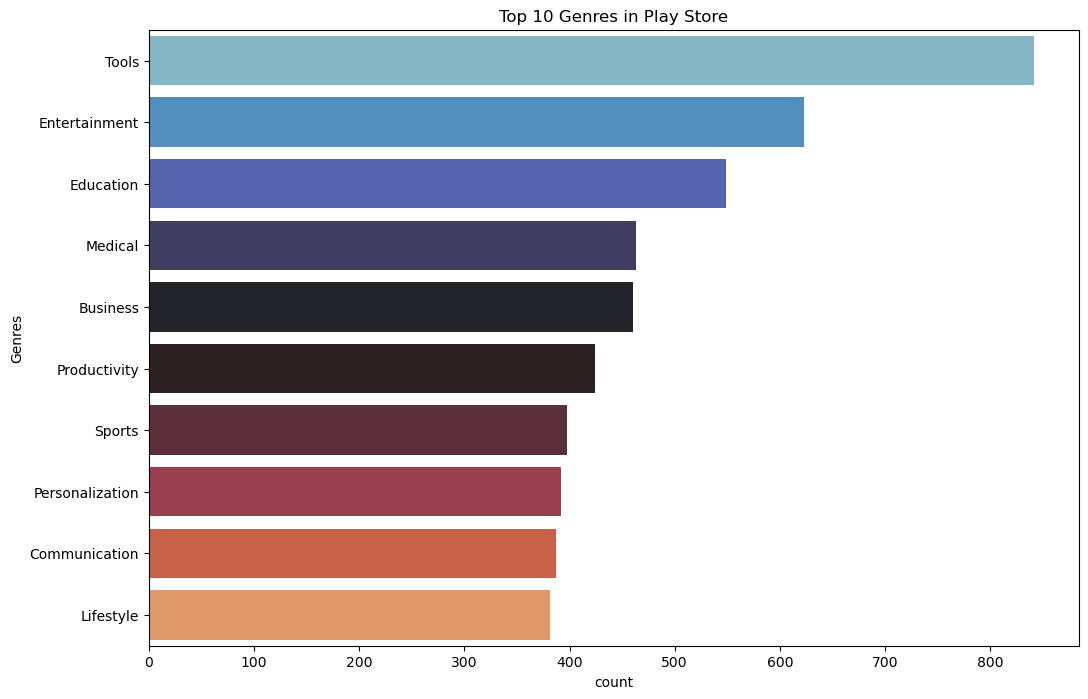

In [7]:
plt.figure(figsize = (12,8))
sns.countplot(y='Genres',order = df['Genres'].value_counts().index[0:10],data = df,palette='icefire')
plt.title('Top 10 Genres in Play Store')

What percentage of apps in the Google Play Store are rated E for Everyone,M for Mature,Teen?

In [8]:
content_counts = list(df['Content Rating'].value_counts())
content_counts_ls = list(df['Content Rating'].value_counts().index)
fig = px.pie(df,values=content_counts,names=content_counts_ls, hole=0.5,color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='Distribution of Apps based on content rating', title_x=0.5,height = 700)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()


From the above graph we can infer that 81.8% apps can be used by everyone 10.7% apps for Teens and 4.07% for Mature.

In [9]:
df_year = df.groupby(['Last Updated']).agg({'App':'nunique'}).reset_index()
fig = px.line(df_year, x='Last Updated', y='App', markers=True,title='Overall apps Releases in Each Years')
fig.show()

# What are the top 5 most popular apps that also have a large number of user reviews?

In [10]:
df = df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False).head(5)
fig = px.bar(df,x='App',y='Reviews',title='Top 5 Most Reviewed apps', text_auto='.2s',height = 700)
fig.show()

 # SUMMARY 

By analyzing these insights, one can gain a better understanding of user preferences and behavior in the US Google Play Store app market, and use this information to make data-driven decisions regarding app development and marketing.